# Facial Emotion Recognition 

## CK+
https://www.kaggle.com/datasets/shawon10/ckplus/data

Contains adaptaded data up to 920 images from 920 original CK+ dataset

Data is already reshaped to 48x48 pixels, in grayscale format and facecropped using haarcascade_frontalface_default.

Noisy (based on room light/hair format/skin colour) images were adapted to be clearly identified using Haar classifier.

Emotions are defined as determined index below:

- 0 : Anger (45 samples)
- 1 : Disgust (59 samples)
- 2 : Fear (25 samples)
- 3 : Happiness (69 samples)
- 4 : Sadness (28 samples)
- 5 : Surprise (83 samples)
- 6 : Neutral (593 samples)
- 7 : Contempt (18 samples)
Pixels contains 2304 pixels (48x48) each row.
Usage is determined as Training(80%) / PublicTest(10%) / PrivateTest(10%)

This dataset was first developed to make a comparison to [ROHIT VERMA - FER2013].(https://www.kaggle.com/datasets/deadskull7/fer2013)

Any problem with dataset feel free to ask.
Updates will only happen to improve data, as collaborators show up to help.

2025-08-06 12:53:44.818226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Subfolders in the dataset: ['ckextended.csv']
First few rows of the dataframe:
   emotion                                             pixels     Usage
0        6  36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...  Training
1        6  88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...  Training
2        6  9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...  Training
3        6  104 106 108 104 95 50 60 61 58 83 126 133 139 ...  Training
4        6  68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...  Training
Number of unique emotions: 8
Number of unique usages: 3


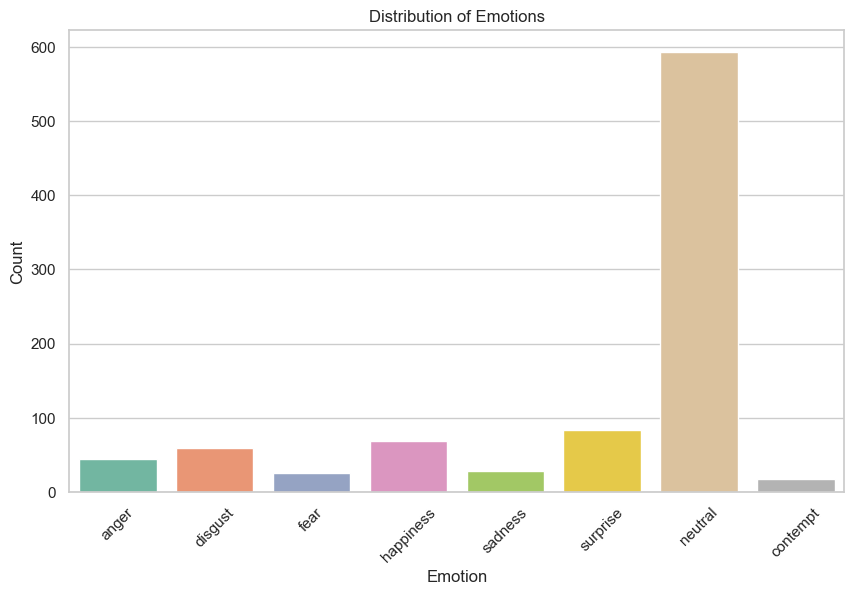

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..', '..')) # or the path to your source code
sys.path.insert(0, module_path)

import warnings
import tensorflow as tf
# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Download dataset
file_path = kagglehub.dataset_download("davilsena/ckdataset")
#file_path = kagglehub.dataset_download("shawon10/ckplus")
# Check subfolders
print("Subfolders in the dataset:", os.listdir(file_path))

df = pd.read_csv(os.path.join(file_path, "ckextended.csv"))
# Check the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())
# Check the number of unique emotions
print("Number of unique emotions:", df['emotion'].nunique())
print("Number of unique usages:", df['Usage'].nunique())
# Check the distribution of emotions
emotion_map = {
    0: "anger",
    1: "disgust",
    2: "fear",
    3: "happiness",
    4: "sadness",
    5: "surprise",
    6: "neutral",
    7: "contempt"
}


['happy', 'contempt', 'fear', 'surprise', 'sadness', 'anger', 'disgust']
# Check the distribution of emotions
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=df, palette="Set2")
plt.title("Distribution of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(ticks=range(8), labels=[emotion_map[i] for i in range(8)], rotation=45)
plt.show()

In [2]:
print("Subfolders in the dataset:", os.listdir(file_path))
#print(os.listdir(os.path.join(file_path, "CK+48", 'happy')))
#print(os.listdir(os.path.join(file_path, "ck/CK+48")))

Subfolders in the dataset: ['ckextended.csv']


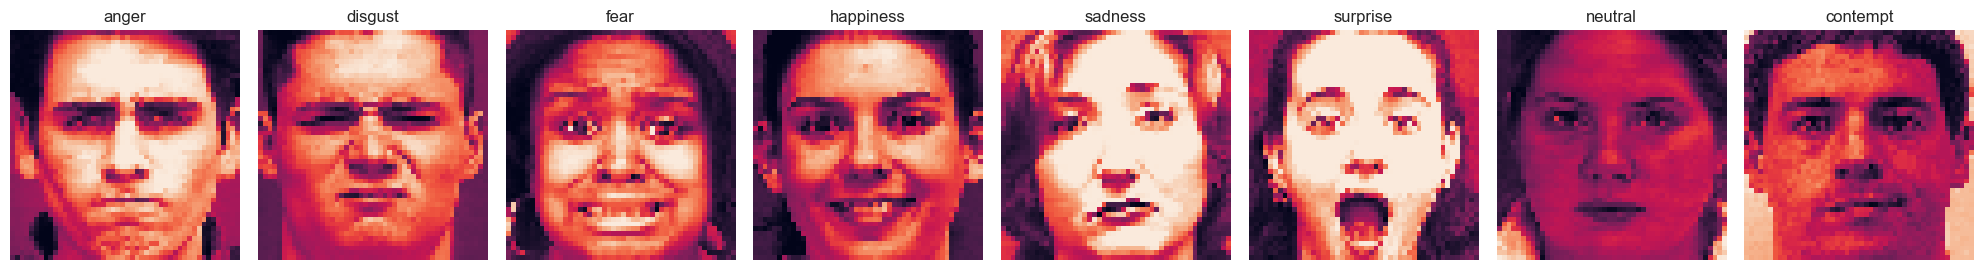

In [3]:
import numpy as np
# Function to plot one image from each emotion
def plot_images_for_emotions(df, emotion_map):
    # Create a figure
    fig, axes = plt.subplots(1, len(emotion_map), figsize=(20, 5))

    for emotion_label, emotion_name in emotion_map.items():
        # Get the first image for the current emotion
        emotion_df = df[df['emotion'] == emotion_label]
        if not emotion_df.empty:
            first_image_str = emotion_df.iloc[0]['pixels'].split(" ")
            # Convert the string representation
            image_array = np.array([int(p) for p in first_image_str])
            image_array = image_array.reshape(48, 48)  # Reshape to 48x48
            # Plot the image
            axes[emotion_label].imshow(image_array)#, cmap='gray')
            axes[emotion_label].set_title(emotion_name)
            axes[emotion_label].axis('off')

    plt.tight_layout()  # Adjust layout
    plt.show()

# Plot images for each emotion
plot_images_for_emotions(df, emotion_map)

## FER2013

Fer2013 dataset is a common dataset used for facial expression recognition. The dataset contains 35,887 grayscale facial images containing 7 different emotions (anger, disgust, fear, happiness, neutral, sad, and surprise).

Data divided into train(80%), test(10%), and validation(10%).
Labels are:
0 - Angry
1 - Disgust
2 - Fear
3 - Happy
4 - Sad
5 - Surprise
6 - Neutral



Subfolders in the dataset: ['fer2013.csv']
First few rows of the dataframe:
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
Number of unique emotions: 7
Number of unique usages: 3


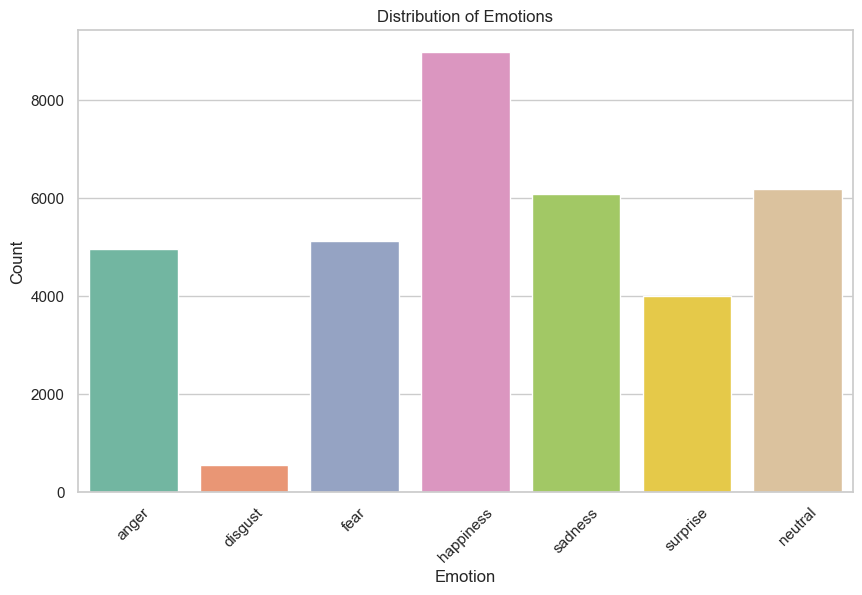

In [4]:
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Download dataset
file_path = kagglehub.dataset_download("deadskull7/fer2013")
# Check subfolders
print("Subfolders in the dataset:", os.listdir(file_path))

df_fer = pd.read_csv(os.path.join(file_path, "fer2013.csv"))
# Check the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df_fer.head())
# Check the number of unique emotions
print("Number of unique emotions:", df_fer['emotion'].nunique())
print("Number of unique usages:", df_fer['Usage'].nunique())

label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4:'sadness', 5: 'surprise', 6: 'neutral'}
# Check the distribution of emotions
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=df_fer, palette="Set2")
plt.title("Distribution of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(ticks=range(7), labels=[label_to_text[i] for i in range(7)], rotation=45)
plt.show()

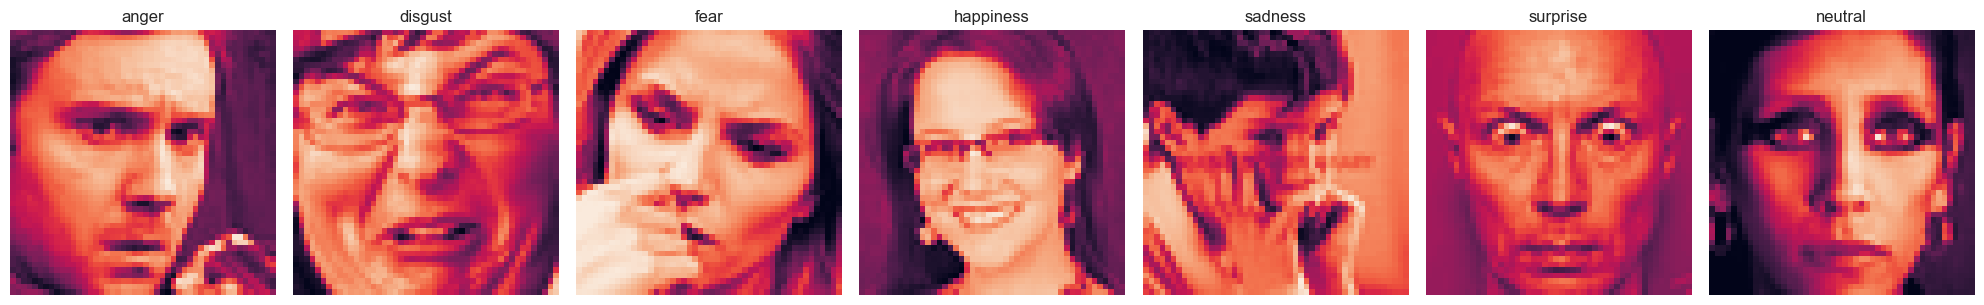

In [5]:
plot_images_for_emotions(df_fer, label_to_text)

In [6]:
df_fer

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


## LFW-emotion dataset
LFW emotion dataset is annotated based on LFW (Labeled Faces in the Wild).
LFW-FER: LFW dataset annotated manually for facial expression recognition study.


In [7]:
from tqdm import tqdm

data_path = os.path.join(module_path, 'data', 'LFW-emotion-dataset', 'LFW-FER', 'eval')
lfw = {
    'emotion': [],
    'pixels': []
}
# make dataframe with 'positive', 'negative', 'neutral' labels
for emotion in tqdm(os.scandir(data_path)):
    if emotion.is_dir():
        emotion_name = emotion.name
        for image in os.scandir(emotion.path):
            if image.is_file():
                # read image to numpy array
                image_array = plt.imread(image.path)
                lfw['emotion'].append(emotion_name)
                lfw['pixels'].append(image_array)

# Convert to DataFrame
df_lfw = pd.DataFrame(lfw)
# Check the first few rows of the dataframe
print(df_lfw.head())
# plot images for each emotion


4it [00:02,  1.48it/s]


    emotion                                             pixels
0  positive  [[[0, 4, 0], [0, 2, 0], [1, 1, 1], [2, 0, 1], ...
1  positive  [[[13, 3, 4], [13, 3, 4], [13, 3, 4], [12, 2, ...
2  positive  [[[50, 44, 30], [51, 45, 31], [52, 46, 30], [5...
3  positive  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4  positive  [[[2, 1, 6], [2, 1, 6], [2, 1, 6], [1, 0, 5], ...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  1157 non-null   object
 1   pixels   1157 non-null   object
dtypes: object(2)
memory usage: 18.2+ KB
None


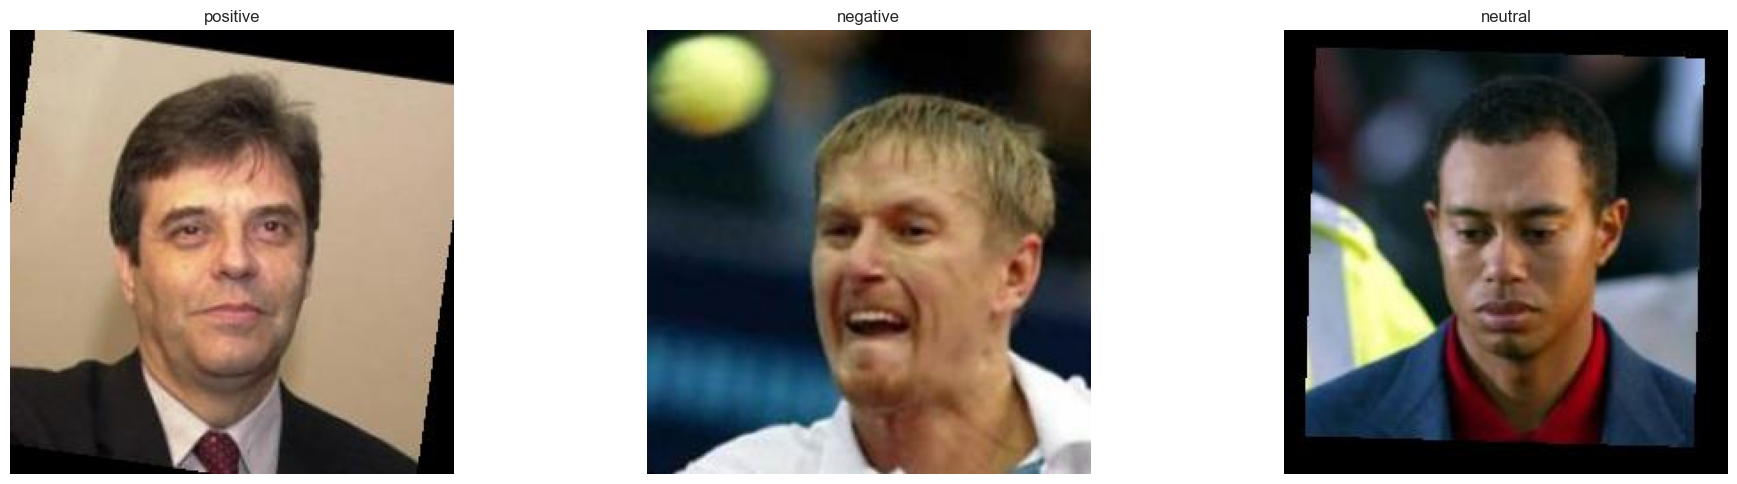

In [8]:
print(df_lfw.info())

# plot images for positive, negative, neutral
plt.figure(figsize=(20, 5))
for i, emotion in enumerate(df_lfw['emotion'].unique()):
    emotion_df = df_lfw[df_lfw['emotion'] == emotion]
    if not emotion_df.empty:
        first_image = emotion_df.iloc[0]['pixels']
        # Plot the image
        plt.subplot(1, 3, i + 1)
        plt.imshow(first_image, cmap='gray')
        plt.title(emotion)
        plt.axis('off')
plt.tight_layout()
plt.show()


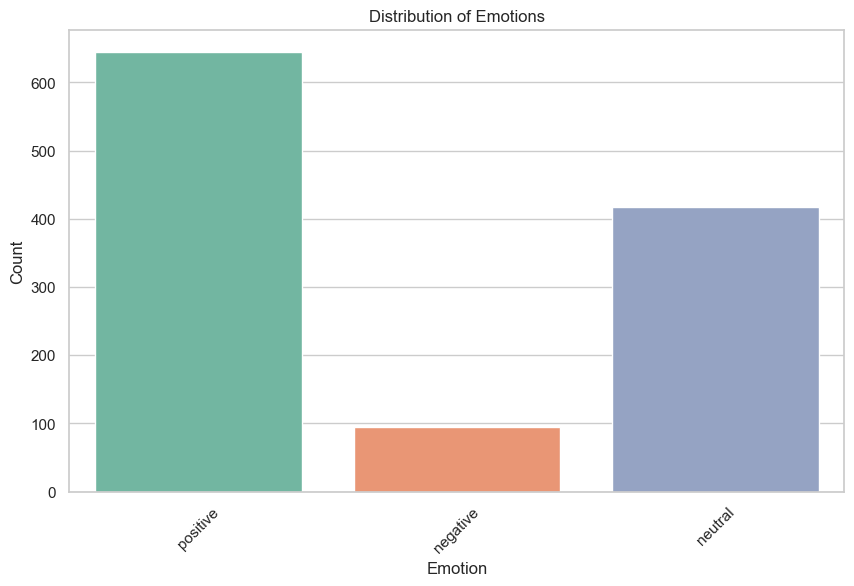

In [9]:
# Check the distribution of emotions
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=df_lfw, palette="Set2")
plt.title("Distribution of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(ticks=range(3), labels=df_lfw['emotion'].unique(), rotation=45)
plt.show()

## Facial Expression Dataset

https://www.kaggle.com/datasets/aadityasinghal/facial-expression-dataset/data

In [32]:
file_path = kagglehub.dataset_download("aadityasinghal/facial-expression-dataset")
test_path = os.path.join(file_path, "test", "test", "fear")
print(os.listdir(test_path))

from src.assistant import EmotionRecognitionAssistant
from tqdm import tqdm
tqdm.pandas()

assistant = EmotionRecognitionAssistant()

results = []
for img_file in tqdm(os.listdir(test_path)):
    img_path = os.path.join(test_path, img_file)
    results.append(assistant.analyze(img_path))

 67%|██████▋   | 682/1024 [06:26<03:20,  1.71it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 683/1024 [06:26<03:13,  1.77it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 684/1024 [06:27<03:06,  1.82it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 685/1024 [06:27<03:02,  1.85it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 686/1024 [06:28<03:01,  1.86it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 687/1024 [06:28<03:02,  1.85it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 688/1024 [06:29<03:00,  1.86it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 689/1024 [06:29<02:53,  1.93it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 690/1024 [06:30<02:51,  1.95it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 691/1024 [06:30<02:52,  1.93it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 692/1024 [06:31<02:56,  1.88it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 693/1024 [06:31<02:55,  1.89it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 694/1024 [06:32<02:56,  1.87it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 695/1024 [06:33<02:54,  1.89it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 696/1024 [06:33<02:53,  1.89it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 697/1024 [06:34<02:52,  1.90it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 698/1024 [06:34<02:52,  1.89it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 699/1024 [06:35<02:51,  1.89it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 700/1024 [06:35<02:47,  1.94it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 701/1024 [06:36<02:46,  1.94it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▊   | 702/1024 [06:36<02:48,  1.91it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▊   | 703/1024 [06:37<02:51,  1.87it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 704/1024 [06:37<02:51,  1.87it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 705/1024 [06:38<02:50,  1.88it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 706/1024 [06:38<02:49,  1.87it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 707/1024 [06:39<02:49,  1.87it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 708/1024 [06:39<02:48,  1.88it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 709/1024 [06:40<02:46,  1.90it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 710/1024 [06:40<02:45,  1.89it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 711/1024 [06:41<02:44,  1.90it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 712/1024 [06:42<02:44,  1.90it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 713/1024 [06:42<02:48,  1.84it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 714/1024 [06:43<02:48,  1.84it/s]

1/1 [==============================] - 0s 30ms/step


 70%|██████▉   | 715/1024 [06:43<02:45,  1.87it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 716/1024 [06:44<02:43,  1.88it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 717/1024 [06:44<02:42,  1.89it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████   | 718/1024 [06:45<02:42,  1.88it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 719/1024 [06:45<02:41,  1.89it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 720/1024 [06:46<02:34,  1.97it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 721/1024 [06:46<02:35,  1.95it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 722/1024 [06:47<02:35,  1.94it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 723/1024 [06:47<02:36,  1.92it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 724/1024 [06:48<02:33,  1.96it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 725/1024 [06:48<02:41,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 726/1024 [06:49<02:39,  1.87it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 727/1024 [06:49<02:38,  1.87it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 728/1024 [06:50<02:37,  1.88it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 729/1024 [06:51<03:28,  1.41it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████▏  | 730/1024 [06:52<03:11,  1.53it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████▏  | 731/1024 [06:52<03:01,  1.61it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████▏  | 732/1024 [06:53<02:54,  1.67it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 733/1024 [06:53<02:47,  1.73it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 734/1024 [06:54<02:44,  1.76it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 735/1024 [06:54<02:41,  1.79it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 736/1024 [06:55<02:40,  1.80it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 737/1024 [06:56<02:49,  1.70it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 738/1024 [06:56<02:54,  1.64it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 739/1024 [06:57<02:47,  1.71it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 740/1024 [06:57<02:50,  1.66it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 741/1024 [06:58<02:52,  1.64it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 742/1024 [06:59<02:55,  1.61it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 743/1024 [06:59<02:53,  1.62it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 744/1024 [07:00<02:56,  1.59it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 745/1024 [07:01<02:59,  1.56it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 746/1024 [07:01<02:58,  1.56it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 747/1024 [07:02<02:54,  1.58it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 748/1024 [07:02<02:53,  1.60it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 749/1024 [07:03<03:03,  1.50it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 750/1024 [07:04<02:56,  1.55it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 751/1024 [07:04<02:55,  1.56it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 752/1024 [07:05<02:50,  1.59it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 753/1024 [07:06<02:48,  1.61it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▎  | 754/1024 [07:06<02:44,  1.65it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▎  | 755/1024 [07:07<02:41,  1.67it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 756/1024 [07:07<02:37,  1.70it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 757/1024 [07:08<02:37,  1.70it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 758/1024 [07:09<02:35,  1.71it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 759/1024 [07:09<02:36,  1.69it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 760/1024 [07:10<02:35,  1.70it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 761/1024 [07:10<02:36,  1.68it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 762/1024 [07:11<02:35,  1.69it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 763/1024 [07:12<02:34,  1.69it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▍  | 764/1024 [07:12<02:35,  1.68it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 765/1024 [07:13<02:32,  1.70it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 766/1024 [07:13<02:34,  1.67it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 767/1024 [07:14<02:24,  1.78it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▌  | 768/1024 [07:14<02:26,  1.74it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 769/1024 [07:15<02:28,  1.71it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 770/1024 [07:16<02:27,  1.72it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 771/1024 [07:16<02:27,  1.71it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 772/1024 [07:17<02:25,  1.73it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 773/1024 [07:17<02:27,  1.70it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 774/1024 [07:18<02:24,  1.73it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 775/1024 [07:18<02:22,  1.75it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 776/1024 [07:19<02:21,  1.75it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 777/1024 [07:20<02:20,  1.76it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 778/1024 [07:20<02:23,  1.71it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 779/1024 [07:21<02:21,  1.74it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 780/1024 [07:21<02:19,  1.75it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▋  | 781/1024 [07:22<02:18,  1.75it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▋  | 782/1024 [07:22<02:17,  1.76it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▋  | 783/1024 [07:23<02:15,  1.77it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 784/1024 [07:24<02:14,  1.78it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 785/1024 [07:24<02:18,  1.72it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 786/1024 [07:25<02:17,  1.73it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 787/1024 [07:25<02:13,  1.78it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 788/1024 [07:26<02:11,  1.80it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 789/1024 [07:26<02:03,  1.90it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 790/1024 [07:27<02:05,  1.87it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 791/1024 [07:27<02:04,  1.87it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 792/1024 [07:28<02:05,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 793/1024 [07:28<02:05,  1.83it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 794/1024 [07:29<02:06,  1.82it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 795/1024 [07:30<02:04,  1.83it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 796/1024 [07:30<02:04,  1.84it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 797/1024 [07:31<02:10,  1.74it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 798/1024 [07:31<02:08,  1.76it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 799/1024 [07:32<02:05,  1.79it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 800/1024 [07:32<02:04,  1.80it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 801/1024 [07:33<02:04,  1.79it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 802/1024 [07:33<02:02,  1.81it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 803/1024 [07:34<02:01,  1.82it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▊  | 804/1024 [07:34<01:54,  1.92it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▊  | 805/1024 [07:35<01:54,  1.91it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 806/1024 [07:36<01:55,  1.88it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 807/1024 [07:36<01:56,  1.86it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 808/1024 [07:37<01:58,  1.82it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 809/1024 [07:37<02:01,  1.76it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 810/1024 [07:38<01:55,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 811/1024 [07:38<01:54,  1.86it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 812/1024 [07:39<01:54,  1.85it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 813/1024 [07:39<01:53,  1.86it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 814/1024 [07:40<01:52,  1.87it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 815/1024 [07:41<01:56,  1.79it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 816/1024 [07:41<01:50,  1.88it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 817/1024 [07:42<01:50,  1.87it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 818/1024 [07:42<01:45,  1.95it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 819/1024 [07:43<01:46,  1.93it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 820/1024 [07:43<01:47,  1.90it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 821/1024 [07:44<01:45,  1.92it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 822/1024 [07:44<01:46,  1.89it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 823/1024 [07:45<01:47,  1.87it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 824/1024 [07:45<01:47,  1.86it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 825/1024 [07:46<01:49,  1.82it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 826/1024 [07:46<01:52,  1.75it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 827/1024 [07:47<01:53,  1.73it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 828/1024 [07:48<01:54,  1.71it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 829/1024 [07:48<01:52,  1.74it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 830/1024 [07:49<01:49,  1.77it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 831/1024 [07:49<01:47,  1.80it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████▏ | 832/1024 [07:50<01:45,  1.82it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 833/1024 [07:50<01:46,  1.79it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 834/1024 [07:51<01:46,  1.78it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 835/1024 [07:51<01:45,  1.78it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 836/1024 [07:52<01:44,  1.80it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 837/1024 [07:53<01:42,  1.83it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 838/1024 [07:53<01:40,  1.85it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 839/1024 [07:54<01:41,  1.82it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 840/1024 [07:54<01:40,  1.83it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 841/1024 [07:55<01:38,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 842/1024 [07:55<01:38,  1.86it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 843/1024 [07:56<01:37,  1.86it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 844/1024 [07:56<01:39,  1.81it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 845/1024 [07:57<01:38,  1.82it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 846/1024 [07:57<01:37,  1.83it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 847/1024 [07:58<01:35,  1.85it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 848/1024 [07:59<01:35,  1.85it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 849/1024 [07:59<01:33,  1.87it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 850/1024 [08:00<01:33,  1.86it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 851/1024 [08:00<01:35,  1.82it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 852/1024 [08:01<01:34,  1.81it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 853/1024 [08:01<01:33,  1.82it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 854/1024 [08:02<01:33,  1.82it/s]

1/1 [==============================] - 0s 70ms/step


 83%|████████▎ | 855/1024 [08:02<01:36,  1.76it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▎ | 856/1024 [08:03<01:34,  1.77it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▎ | 857/1024 [08:04<01:32,  1.80it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 858/1024 [08:04<01:31,  1.81it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 859/1024 [08:05<01:30,  1.83it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 860/1024 [08:05<01:30,  1.82it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 861/1024 [08:06<01:28,  1.84it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 862/1024 [08:06<01:24,  1.92it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 863/1024 [08:07<01:23,  1.93it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 864/1024 [08:07<01:20,  1.98it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 865/1024 [08:08<01:20,  1.97it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 866/1024 [08:08<01:22,  1.91it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 867/1024 [08:09<01:26,  1.81it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 868/1024 [08:09<01:25,  1.83it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 869/1024 [08:10<01:24,  1.84it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 870/1024 [08:10<01:23,  1.84it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 871/1024 [08:11<01:23,  1.84it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 872/1024 [08:12<01:22,  1.85it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 873/1024 [08:12<01:21,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 874/1024 [08:13<01:21,  1.84it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 875/1024 [08:13<01:21,  1.83it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 876/1024 [08:14<01:19,  1.86it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 877/1024 [08:14<01:18,  1.86it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 878/1024 [08:15<01:22,  1.76it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 879/1024 [08:15<01:21,  1.79it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 880/1024 [08:16<01:19,  1.80it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 881/1024 [08:16<01:18,  1.81it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 882/1024 [08:17<01:18,  1.81it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 883/1024 [08:18<01:17,  1.83it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▋ | 884/1024 [08:18<01:15,  1.85it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▋ | 885/1024 [08:19<01:15,  1.84it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 886/1024 [08:19<01:16,  1.81it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 887/1024 [08:20<01:13,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 888/1024 [08:20<01:12,  1.86it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 889/1024 [08:21<01:16,  1.76it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 890/1024 [08:21<01:15,  1.79it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 891/1024 [08:22<01:13,  1.82it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 892/1024 [08:23<01:11,  1.83it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 893/1024 [08:23<01:12,  1.82it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 894/1024 [08:24<01:11,  1.81it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 895/1024 [08:24<01:11,  1.81it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 896/1024 [08:25<01:12,  1.77it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 897/1024 [08:25<01:10,  1.79it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 898/1024 [08:26<01:10,  1.79it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 899/1024 [08:26<01:08,  1.82it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 900/1024 [08:27<01:07,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 901/1024 [08:28<01:09,  1.77it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 902/1024 [08:28<01:05,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 903/1024 [08:29<01:04,  1.87it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 904/1024 [08:29<01:04,  1.87it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 905/1024 [08:30<01:03,  1.87it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 906/1024 [08:30<01:02,  1.88it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▊ | 907/1024 [08:31<01:03,  1.86it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 908/1024 [08:31<01:02,  1.87it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 909/1024 [08:32<01:01,  1.87it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 910/1024 [08:32<01:00,  1.88it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 911/1024 [08:33<00:57,  1.95it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 912/1024 [08:33<01:00,  1.85it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 913/1024 [08:34<00:59,  1.86it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 914/1024 [08:34<00:58,  1.87it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 915/1024 [08:35<00:58,  1.85it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 916/1024 [08:35<00:55,  1.95it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 917/1024 [08:36<00:55,  1.94it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████▉ | 918/1024 [08:36<00:54,  1.93it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████▉ | 919/1024 [08:37<00:55,  1.89it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 920/1024 [08:38<00:54,  1.90it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 921/1024 [08:38<00:54,  1.88it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 922/1024 [08:39<00:54,  1.88it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 923/1024 [08:39<00:56,  1.80it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 924/1024 [08:40<00:55,  1.82it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 925/1024 [08:40<00:54,  1.83it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 926/1024 [08:41<00:53,  1.84it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 927/1024 [08:41<00:53,  1.82it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 928/1024 [08:42<00:52,  1.83it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 929/1024 [08:42<00:51,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 930/1024 [08:43<00:50,  1.86it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 931/1024 [08:44<00:50,  1.84it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 932/1024 [08:44<00:50,  1.81it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 933/1024 [08:45<00:48,  1.86it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 934/1024 [08:46<00:59,  1.50it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████▏| 935/1024 [08:46<00:57,  1.54it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████▏| 936/1024 [08:47<00:55,  1.59it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 937/1024 [08:47<00:50,  1.71it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 938/1024 [08:48<00:50,  1.69it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 939/1024 [08:48<00:50,  1.68it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 940/1024 [08:49<00:50,  1.68it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 941/1024 [08:50<00:49,  1.66it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 942/1024 [08:50<00:47,  1.71it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 943/1024 [08:51<00:47,  1.70it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 944/1024 [08:51<00:46,  1.71it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 945/1024 [08:52<00:45,  1.73it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 946/1024 [08:53<00:45,  1.72it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 947/1024 [08:53<00:42,  1.83it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 948/1024 [08:54<00:41,  1.81it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 949/1024 [08:54<00:41,  1.80it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 950/1024 [08:55<00:42,  1.75it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 951/1024 [08:55<00:41,  1.75it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 952/1024 [08:56<00:40,  1.76it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 953/1024 [08:56<00:40,  1.76it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 954/1024 [08:57<00:39,  1.77it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 955/1024 [08:58<00:39,  1.76it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 956/1024 [08:58<00:38,  1.77it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 957/1024 [08:59<00:38,  1.75it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 958/1024 [08:59<00:35,  1.86it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 959/1024 [09:00<00:35,  1.83it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 960/1024 [09:00<00:35,  1.81it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 961/1024 [09:01<00:35,  1.78it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 962/1024 [09:02<00:35,  1.77it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 963/1024 [09:02<00:33,  1.80it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 964/1024 [09:03<00:33,  1.81it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 965/1024 [09:03<00:34,  1.73it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 966/1024 [09:04<00:32,  1.76it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 967/1024 [09:04<00:31,  1.80it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 968/1024 [09:05<00:30,  1.83it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 969/1024 [09:05<00:27,  2.00it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 970/1024 [09:06<00:27,  1.96it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 971/1024 [09:06<00:27,  1.91it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 972/1024 [09:07<00:27,  1.88it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 973/1024 [09:07<00:25,  1.97it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 974/1024 [09:08<00:25,  1.96it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 975/1024 [09:08<00:25,  1.93it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 976/1024 [09:09<00:25,  1.89it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 977/1024 [09:09<00:24,  1.89it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 978/1024 [09:10<00:24,  1.88it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 979/1024 [09:11<00:23,  1.88it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 980/1024 [09:11<00:24,  1.80it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 981/1024 [09:12<00:23,  1.82it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 982/1024 [09:12<00:22,  1.83it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 983/1024 [09:13<00:22,  1.86it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 984/1024 [09:13<00:21,  1.87it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 985/1024 [09:14<00:20,  1.88it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 986/1024 [09:14<00:20,  1.89it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 987/1024 [09:15<00:19,  1.89it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 988/1024 [09:15<00:18,  1.90it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 989/1024 [09:16<00:18,  1.91it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 990/1024 [09:16<00:17,  1.91it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 991/1024 [09:17<00:17,  1.92it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 992/1024 [09:17<00:15,  2.02it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 993/1024 [09:18<00:15,  1.99it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 994/1024 [09:18<00:15,  1.95it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 995/1024 [09:19<00:14,  1.95it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 996/1024 [09:19<00:14,  1.95it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 997/1024 [09:20<00:13,  1.94it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 998/1024 [09:20<00:13,  1.94it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 999/1024 [09:21<00:12,  1.94it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 1000/1024 [09:21<00:12,  1.93it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 1001/1024 [09:22<00:11,  1.93it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 1002/1024 [09:23<00:11,  1.94it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1003/1024 [09:23<00:10,  1.93it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 1004/1024 [09:24<00:10,  1.95it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1005/1024 [09:24<00:09,  1.95it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 1006/1024 [09:25<00:09,  1.95it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 1007/1024 [09:25<00:08,  1.96it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 1008/1024 [09:26<00:08,  1.95it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▊| 1009/1024 [09:26<00:08,  1.84it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 1010/1024 [09:27<00:07,  1.86it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 1011/1024 [09:27<00:06,  1.88it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 1012/1024 [09:28<00:06,  1.90it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 1013/1024 [09:28<00:05,  1.91it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 1014/1024 [09:29<00:05,  1.92it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 1015/1024 [09:29<00:04,  1.94it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 1016/1024 [09:30<00:04,  1.94it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 1017/1024 [09:30<00:03,  2.01it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 1018/1024 [09:31<00:03,  1.98it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 1019/1024 [09:31<00:02,  1.97it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 1020/1024 [09:32<00:02,  1.96it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 1021/1024 [09:32<00:01,  1.95it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 1022/1024 [09:33<00:01,  1.95it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 1023/1024 [09:33<00:00,  1.88it/s]

1/1 [==============================] - 0s 27ms/step


100%|██████████| 1024/1024 [09:34<00:00,  1.78it/s]


In [ ]:
for i in results:
    if 'dominant_emotion' not in i['face_emotion'].keys():
        i['face_emotion']['dominant_emotion'] = "no face"
pd.Series([r['face_emotion']['dominant_emotion'] for r in results]).value_counts()

fear        301
sad         159
neutral     153
no face     134
angry       119
surprise     82
happy        71
disgust       5
Name: count, dtype: int64

: 

In [31]:
for i in results:
    if 'dominant_emotion' not in i['face_emotion'].keys():
        i['face_emotion']['dominant_emotion'] = "no face"
pd.Series([r['face_emotion']['dominant_emotion'] for r in results]).value_counts()

surprise    429
fear        143
no face      93
neutral      57
happy        49
angry        35
sad          25
Name: count, dtype: int64

In [29]:
for i in results:
    if 'dominant_emotion' not in i['face_emotion'].keys():
        i['face_emotion']['dominant_emotion'] = "no face"
pd.Series([r['face_emotion']['dominant_emotion'] for r in results]).value_counts()

sad         382
neutral     323
no face     209
fear        133
angry        97
happy        74
surprise     21
disgust       8
Name: count, dtype: int64

In [27]:
for i in results:
    if 'dominant_emotion' not in i['face_emotion'].keys():
        i['face_emotion']['dominant_emotion'] = "no face"
pd.Series([r['face_emotion']['dominant_emotion'] for r in results]).value_counts()

happy       1302
no face      154
neutral      129
fear          67
sad           59
angry         34
surprise      26
disgust        3
Name: count, dtype: int64

# Make predictions using DeepFace

In [11]:
ck_imgs = [
    np.array([int(j) for j in df.iloc[i]['pixels'].split(" ")]).reshape(48, 48)
    for i in range(len(df))
]


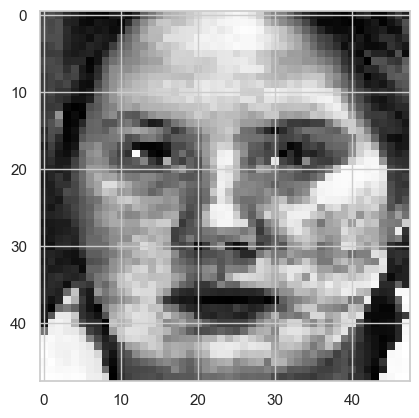

In [12]:
import cv2
def equalize_contrast_lab(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    lab_eq = cv2.merge((l_eq, a, b))
    return cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

def apply_clahe(image):
    img = image.astype(np.uint8) #np.array(image.convert('L'))  # Convert to grayscale
    clahe = cv2.createCLAHE(clipLimit=0., tileGridSize=(2,2))
    enhanced = clahe.apply(img)
    return enhanced

def sharpen_image(image):
    img = image.astype(np.uint8)
    kernel = np.array([[0, -1, 0],
                       [-1, 6,-1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(img, -1, kernel)
    return sharpened

#img = sharpen_image(ck_imgs[0])
img = apply_clahe(ck_imgs[0])

#plt.imshow(ck_imgs[0], cmap='gray')
plt.imshow(img, cmap='gray')

In [1]:

from PIL import Image
import cv2
from tqdm import tqdm
from src.recognizers import FaceEmotionRecognizer


def test_face_emotion_recognizer(img_list):
    # Initialize the recognizer
    recognizer = FaceEmotionRecognizer('opencv')
    # Load the Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    predictions = []
    #img = ck_imgs[0]
    for img in tqdm(img_list):
        # Ensure data type is uint8
        gray_image = img.astype(np.uint8)

        # equalize the histogram
        #gray_image = sharpen_image(gray_image)
        gray_image = apply_clahe(gray_image)
        
        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray_image, 1.3, 1)
        if len(faces) > 0:
            x, y, w, h = faces[0]
            face_img = gray_image[y:y+h, x:x+w]
            pil_image = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
            predictions.append(recognizer.analyze_image(pil_image)['dominant_emotion'])
        else:
            pil_image = Image.fromarray(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
            predictions.append(recognizer.analyze_image(pil_image)['dominant_emotion'])

    return predictions




ModuleNotFoundError: No module named 'src'

In [ ]:
df['pred'] = test_face_emotion_recognizer(ck_imgs)
# face recognition 7m17.3s (mtcnn)
# 18s opencv


  0%|          | 0/920 [00:00<?, ?it/s]

100%|██████████| 920/920 [00:18<00:00, 50.84it/s]


Classification Report:
              precision    recall  f1-score   support

       angry       0.04      0.04      0.04        45
    contempt       0.00      0.00      0.00        18
     disgust       0.00      0.00      0.00        59
        fear       0.23      0.20      0.21        25
       happy       0.77      0.80      0.79        69
     neutral       0.86      0.74      0.80       593
         sad       0.10      0.68      0.18        28
    surprise       0.94      0.88      0.91        83

    accuracy                           0.65       920
   macro avg       0.37      0.42      0.37       920
weighted avg       0.71      0.65      0.67       920



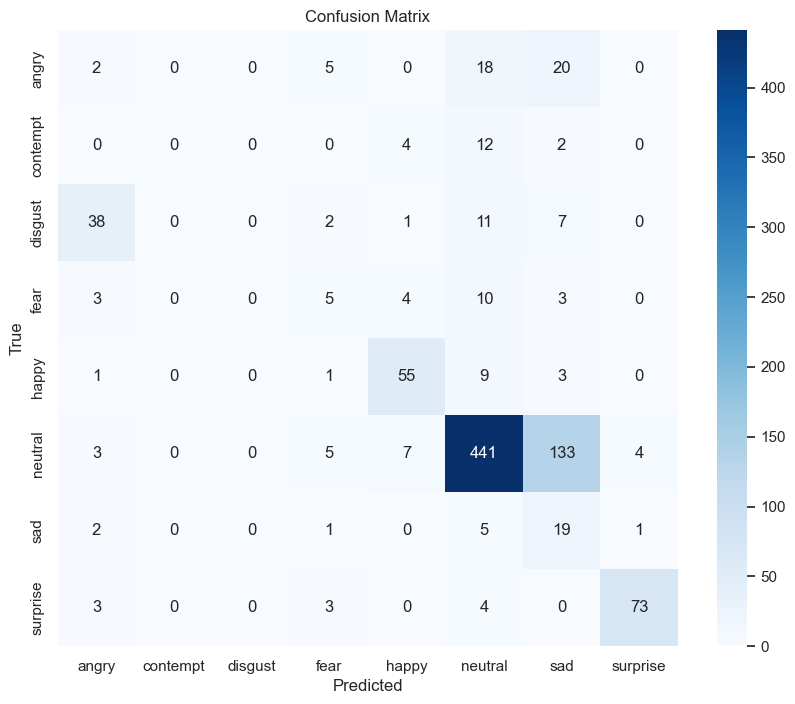

In [176]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report
report = classification_report(df['emo'], df['pred'])
# Print the classification report
print("Classification Report:")
print(report)
# generate the confusion matrix
conf_matrix = confusion_matrix(df['emo'], df['pred'])
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
emotions = ['angry', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
sns.heatmap(conf_matrix, annot=True, fmt='1', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#65% with CLAHE

In [21]:
print(df['pred'].value_counts())
df.head()

pred
neutral     453
sad         189
happy        84
angry        82
surprise     76
fear         31
disgust       5
Name: count, dtype: int64


,emotion,pixels,Usage,pred
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training,sad
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training,sad
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training,neutral
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training,sad
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training,sad


In [31]:
print(df['pred'].value_counts())
df.head()

pred
neutral     453
sad         178
happy        91
angry        89
surprise     79
fear         24
disgust       6
Name: count, dtype: int64


,emotion,pixels,Usage,pred,emo
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training,sad,neutral
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training,sad,neutral
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training,neutral,neutral
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training,sad,neutral
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training,neutral,neutral


In [86]:

emotion_map = {
    0: "angry",
    1: "disgust",
    2: "fear",
    3: "happy",
    4: "sad",
    5: "surprise",
    6: "neutral",
    7: "contempt"
}


df['emo'] = df['emotion'].map(emotion_map)
df.head()

,emotion,pixels,Usage,pred,emo
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training,sad,neutral
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training,sad,neutral
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training,neutral,neutral
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training,sad,neutral
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training,sad,neutral


In [15]:
df.to_csv("ckdataset_mtcnn.csv", index=False)

In [11]:
df[df['pred'] == 'No face detected']

,emotion,pixels,Usage,pred,emo


Classification Report:
              precision    recall  f1-score   support

       angry       0.11      0.13      0.12        45
    contempt       0.00      0.00      0.00        18
     disgust       1.00      0.05      0.10        59
        fear       0.17      0.20      0.18        25
       happy       0.72      0.88      0.79        69
     neutral       0.89      0.66      0.76       593
         sad       0.08      0.71      0.14        28
    surprise       0.96      0.65      0.78        83

    accuracy                           0.59       920
   macro avg       0.49      0.41      0.36       920
weighted avg       0.79      0.59      0.64       920



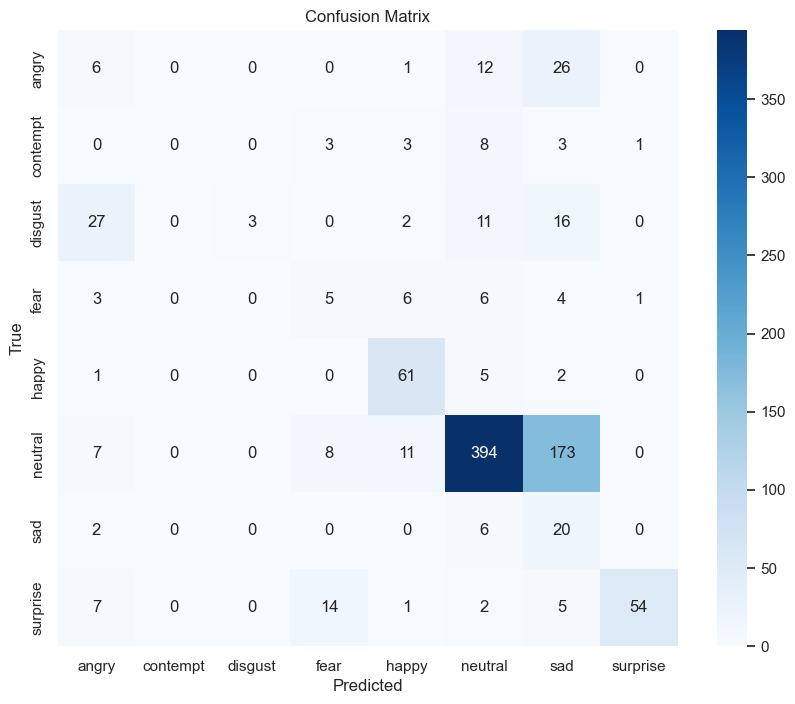

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report
report = classification_report(df['emo'], df['pred'])
# Print the classification report
print("Classification Report:")
print(report)
# generate the confusion matrix
conf_matrix = confusion_matrix(df['emo'], df['pred'])
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
emotions = ['angry', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
sns.heatmap(conf_matrix, annot=True, fmt='1', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#65% with CLAHE

# error analisys

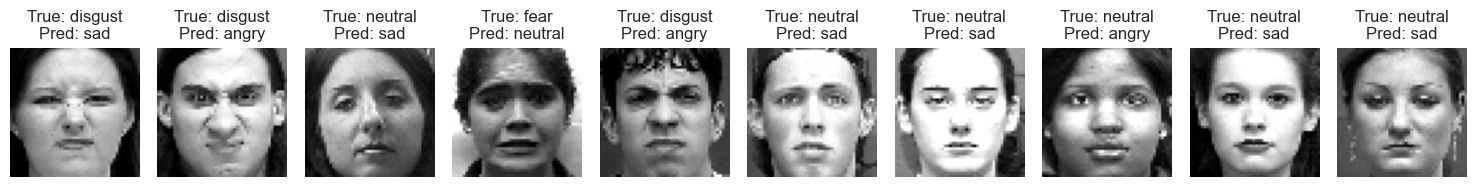

In [88]:
# get wrong predictions
wrong_predictions = df[df['emo'] != df['pred']]
#print("Wrong Predictions:")
#print(wrong_predictions[['emo', 'pred']])
# plot wrong predictions
plt.figure(figsize=(500, 500))
for i, row in enumerate(wrong_predictions.sample(10).iterrows()):
    _, row_data = row
    plt.subplot(1, len(wrong_predictions), i + 1)
    img = np.array([int(j) for j in row_data['pixels'].split(" ")]).reshape(48, 48)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {row_data['emo']}\nPred: {row_data['pred']}")
    plt.axis('off')
plt.tight_layout()

Classification Report:
              precision    recall  f1-score   support

       angry       0.11      0.20      0.14        45
    contempt       0.00      0.00      0.00        18
     disgust       1.00      0.08      0.16        59
        fear       0.26      0.32      0.29        25
       happy       0.73      0.88      0.80        69
     neutral       0.88      0.67      0.76       593
         sad       0.08      0.54      0.14        28
    surprise       0.95      0.87      0.91        83

    accuracy                           0.62       920
   macro avg       0.50      0.45      0.40       920
weighted avg       0.79      0.62      0.66       920



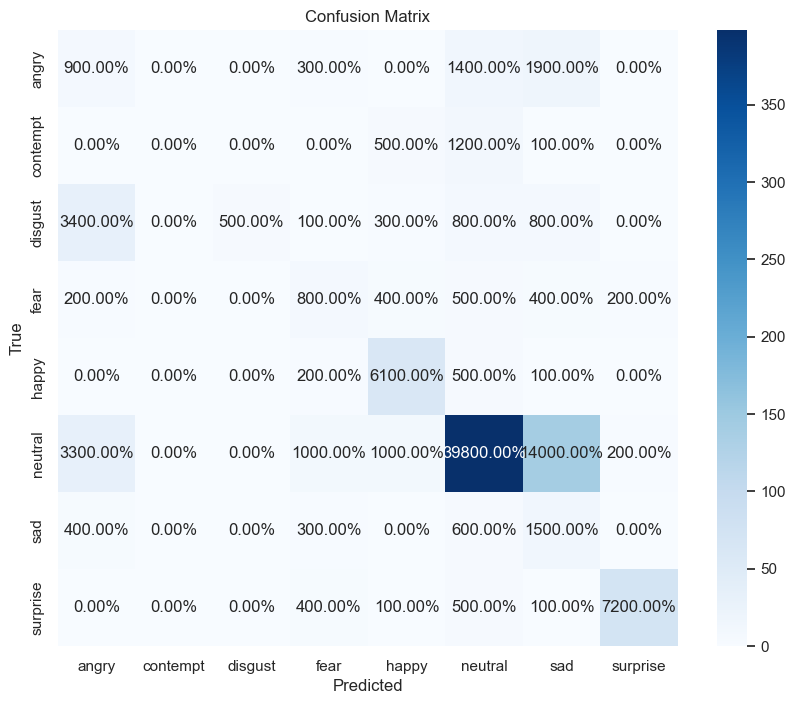

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report
report = classification_report(df['emo'], df['pred'])
# Print the classification report
print("Classification Report:")
print(report)
# generate the confusion matrix
conf_matrix = confusion_matrix(df['emo'], df['pred'])
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
emotions = ['angry', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
sns.heatmap(conf_matrix, annot=True, fmt='.2%', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# RAF-DB

shuvoalok/raf-db-dataset

Subfolders in the dataset: ['train_labels.csv', 'test_labels.csv', 'DATASET']


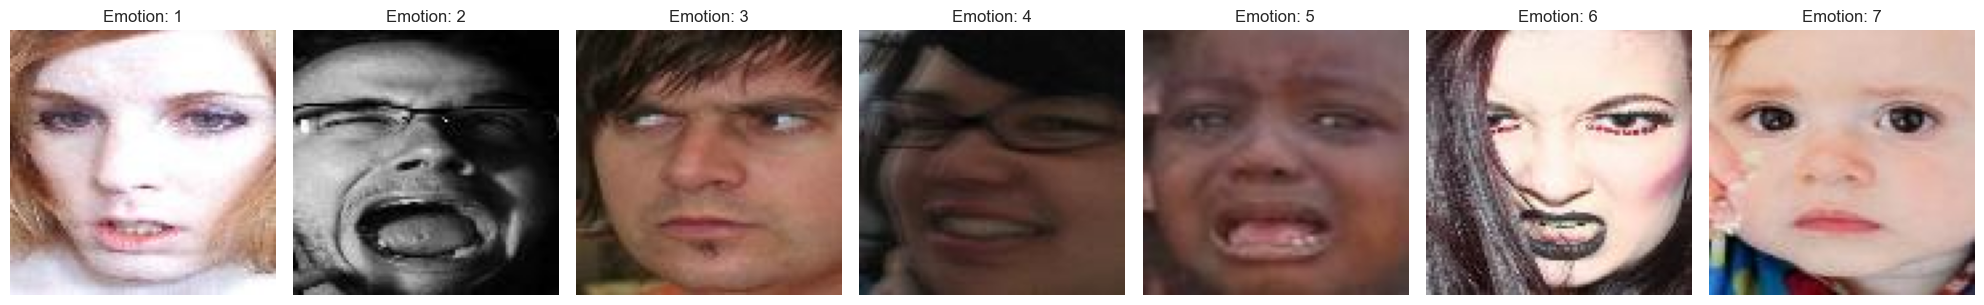

First few rows of the dataframe:
                   image  label
0  test_0001_aligned.jpg      5
1  test_0002_aligned.jpg      1
2  test_0003_aligned.jpg      4
3  test_0004_aligned.jpg      1
4  test_0005_aligned.jpg      5


In [186]:
# Download the dataset
file_path = kagglehub.dataset_download("shuvoalok/raf-db-dataset")
imgs_path = os.path.join(file_path, "DATASET", "test")
# Check subfolders
print("Subfolders in the dataset:", os.listdir(file_path))
# Plot an image of each folder ["1", "2", "3", "4", "5", "6", "7"]
import cv2
import numpy as np
def plot_images_from_folders(imgs_path, folders):
    plt.figure(figsize=(20, 5))
    for i, folder in enumerate(folders):
        folder_path = os.path.join(imgs_path, folder)
        if os.path.exists(folder_path):
            images = os.listdir(folder_path)
            if images:
                img_path = os.path.join(folder_path, images[2])  # Take the first image
                img = cv2.imread(img_path)
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting
                plt.subplot(1, len(folders), i + 1)
                plt.imshow(img_rgb)
                plt.title(f"Emotion: {folder}")
                plt.axis('off')
    plt.tight_layout()
    plt.show()
plot_images_from_folders(imgs_path, ["1", "2", "3", "4", "5", "6", "7"])

# load the dataset
import pandas as pd
df_raf = pd.read_csv(os.path.join(file_path, "test_labels.csv"))
# Check the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df_raf.head())


In [188]:

emotion_map = {
    1: "surprise",
    2: "fear",
    3: "disgust",
    4: "happy",
    5: "sad",
    6: "angry",
    7: "neutral"
}

df_raf['emo'] = df_raf['label'].map(emotion_map)

raf_imgs = []
# read images from each of the folders in column "label"
for i in tqdm(range(len(df_raf))):
    folder = str(df_raf.iloc[i]['label'])
    img_path = os.path.join(imgs_path, folder, df_raf.iloc[i]['image'])
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting
            raf_imgs.append(img_rgb)
        else:
            raf_imgs.append("Missing image")

len(raf_imgs)

100%|██████████| 3068/3068 [00:02<00:00, 1221.61it/s]


3068

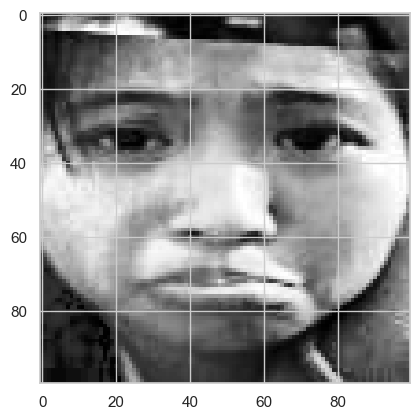

In [202]:
def apply_clahe(image):
    img = np.array(image)  # Convert to numpy array
    # If the image is grayscale, it will be a 2D array, so we need to ensure it is in the correct format
    if len(img.shape) == 2:
        img = img.astype(np.uint8)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # If the image is not in grayscale, convert it to grayscale

    clahe = cv2.createCLAHE(clipLimit=0., tileGridSize=(2,2))
    enhanced = clahe.apply(img)
    return enhanced

def sharpen_image(image):
    img = np.array(image)
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(img, -1, kernel)
    return sharpened

img = apply_clahe(raf_imgs[0])
#plt.imshow(raf_imgs[0], cmap='gray')
plt.imshow(img, cmap='gray')

In [212]:
def test_face_emotion_recognizer(img_list):
    # Initialize the recognizer
    recognizer = FaceEmotionRecognizer('ssd')
    # Load the Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    predictions = []
    #img = ck_imgs[0]
    for img in tqdm(img_list):
        # Ensure data type is uint8
        #gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
        gray_image = img.astype(np.uint8)
        #gray_image = apply_clahe(gray_image.astype(np.uint8))
        # Detect faces in the image
        #faces = face_cascade.detectMultiScale(gray_image, 1.3, 1)
        #if len(faces) > 0:
        #    x, y, w, h = faces[0]
        #    face_img = gray_image[y:y+h, x:x+w]
        #    pil_image = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
        #    predictions.append(recognizer.analyze_image(pil_image)['dominant_emotion'])
        #else:
        pil_image = Image.fromarray(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
        predictions.append(recognizer.analyze_image(pil_image)['dominant_emotion'])

    return predictions

df_raf['pred'] = test_face_emotion_recognizer(raf_imgs)

# with face detection 29m18.6s (mtcnn)
# 1m11.2s (opencv)
# 2min (ssd, skip, dlib)
# 1h30m11.2s (retinaface)

  0%|          | 0/3068 [00:00<?, ?it/s]

100%|██████████| 3068/3068 [02:31<00:00, 20.22it/s]


Classification Report:
              precision    recall  f1-score   support

       angry       0.27      0.40      0.32       162
     disgust       0.26      0.03      0.06       160
        fear       0.06      0.23      0.09        74
       happy       0.71      0.79      0.75      1185
     neutral       0.52      0.50      0.51       680
         sad       0.32      0.31      0.31       478
    surprise       0.79      0.18      0.29       329

    accuracy                           0.51      3068
   macro avg       0.42      0.35      0.33      3068
weighted avg       0.55      0.51      0.50      3068



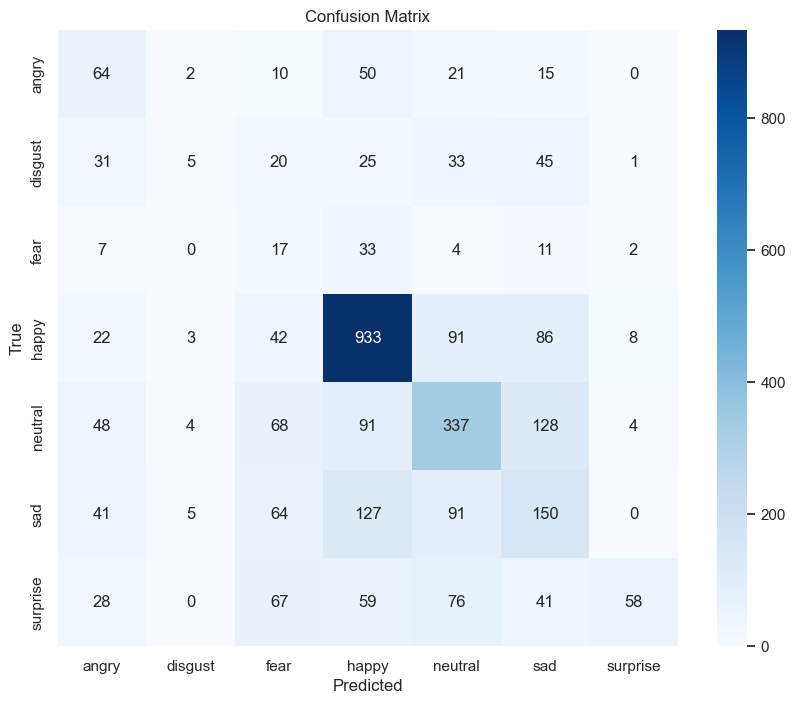

In [ ]:
# Generate the classification report
report = classification_report(df_raf['emo'], df_raf['pred'])
# Print the classification report
print("Classification Report:")
print(report)
# generate the confusion matrix
conf_matrix = confusion_matrix(df_raf['emo'], df_raf['pred'])
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 51% without CLAHE and with face detection (opencv)
# 48% with CLAHE and face detection (opencv)
# 52% without CLAHE and face detection (opencv)
# 46% (dlib) 51% (skip) 51% (ssd)

## FER2013

In [ ]:
def test_face_emotion_recognizer(img_list):
    # Initialize the recognizer
    recognizer = FaceEmotionRecognizer()
    # Load the Haar Cascade classifier for face detection
    #face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    predictions = []
    #img = ck_imgs[0]
    for img in tqdm(img_list):
        # Ensure data type is uint8
        gray_image = img.astype(np.uint8)
        # Detect faces in the image
        #faces = face_cascade.detectMultiScale(gray_image, 1.3, 1)
        #if len(faces) > 0:
            #x, y, w, h = faces[0]
            #face_img = gray_image[y:y+h, x:x+w]
            #pil_image = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
            #predictions.append(recognizer.analyze_image(pil_image)['dominant_emotion'])
        #else:
        pil_image = Image.fromarray(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
        predictions.append(recognizer.analyze_image(pil_image)['dominant_emotion'])

    return predictions

df_fer['pred'] = test_face_emotion_recognizer(fer_imgs)

# with face detection 29m18.6s

In [ ]:
df_fer

,emotion,pixels,Usage,pred,emo
32298,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...,PrivateTest,angry,anger
32299,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...,PrivateTest,neutral,surprise
32300,6,232 240 241 239 237 235 246 117 24 24 22 13 12...,PrivateTest,fear,neutral
32301,4,200 197 149 139 156 89 111 58 62 95 113 117 11...,PrivateTest,neutral,sadness
32302,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...,PrivateTest,fear,fear
...,...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,neutral,neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,happy,happiness
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,neutral,anger
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,happy,happiness


Classification Report:
              precision    recall  f1-score   support

       angry       0.43      0.34      0.38       491
     disgust       0.17      0.04      0.06        55
        fear       0.27      0.28      0.28       528
       happy       0.74      0.71      0.72       879
     neutral       0.39      0.47      0.43       626
         sad       0.33      0.43      0.37       594
    surprise       0.64      0.44      0.52       416

    accuracy                           0.47      3589
   macro avg       0.42      0.39      0.39      3589
weighted avg       0.48      0.47      0.47      3589



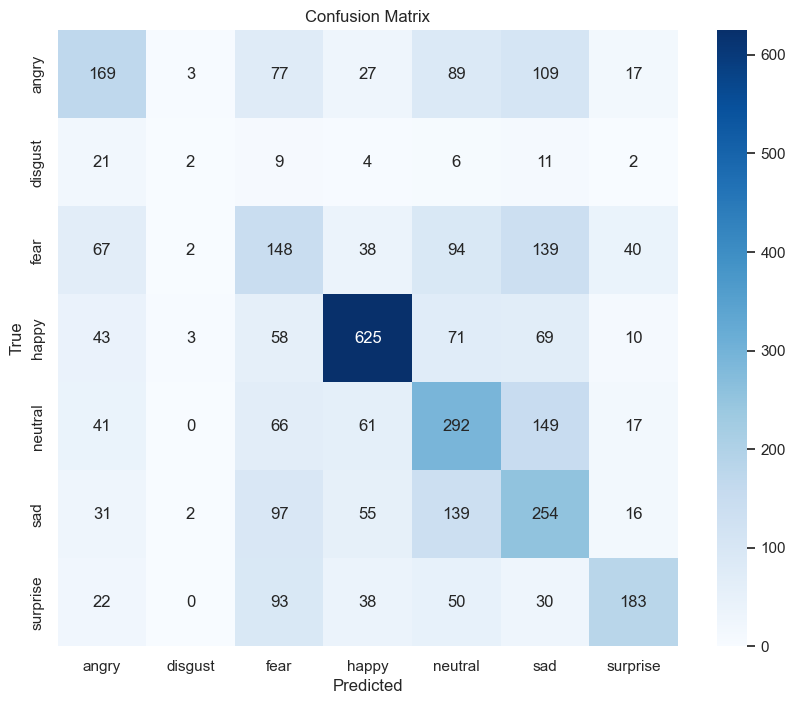

In [114]:

from sklearn.metrics import classification_report, confusion_matrix
emotion_map = {
    0: "angry",
    1: "disgust",
    2: "fear",
    3: "happy",
    4: "sad",
    5: "surprise",
    6: "neutral"
}
df_fer['emo'] = df_fer['emotion'].map(emotion_map)
# Generate the classification report
report = classification_report(df_fer['emo'], df_fer['pred'])
# Print the classification report
print("Classification Report:")
print(report)
# generate the confusion matrix
conf_matrix = confusion_matrix(df_fer['emo'], df_fer['pred'])
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

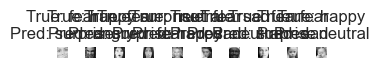

In [ ]:
# get wrong predictions
wrong_predictions = df_fer[df_fer['emo'] != df_fer['pred']]
#print("Wrong Predictions:")
#print(wrong_predictions[['emo', 'pred']])
# plot wrong predictions
plt.figure(figsize=(500, 500))
for i, row in enumerate(wrong_predictions.sample(10).iterrows()):
    _, row_data = row
    plt.subplot(1, len(wrong_predictions), i + 1)
    img = np.array([int(j) for j in row_data['pixels']])#.reshape(48, 48)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {row_data['emo']}\nPred: {row_data['pred']}")
    plt.axis('off')
plt.tight_layout()

In [51]:
df_lfw.head()

,emotion,pixels
0,positive,"[[[0, 4, 0], [0, 2, 0], [1, 1, 1], [2, 0, 1], ..."
1,positive,"[[[13, 3, 4], [13, 3, 4], [13, 3, 4], [12, 2, ..."
2,positive,"[[[50, 44, 30], [51, 45, 31], [52, 46, 30], [5..."
3,positive,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,positive,"[[[2, 1, 6], [2, 1, 6], [2, 1, 6], [1, 0, 5], ..."


In [ ]:
lfw_imgs = [
    np.array([j for j in df_lfw.iloc[i]['pixels']])#.reshape(48, 48)
    for i in range(len(df_lfw))
]

def test_face_emotion_recognizer(img_list):
    # Initialize the recognizer
    recognizer = FaceEmotionRecognizer()
    # Load the Haar Cascade classifier for face detection
    #face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    predictions = []
    #img = ck_imgs[0]
    for img in tqdm(img_list):
        # Ensure data type is uint8
        #gray_image = img.astype(np.uint8)
        # Detect faces in the image
        #faces = face_cascade.detectMultiScale(gray_image, 1.3, 1)
        #if len(faces) > 0:
            #x, y, w, h = faces[0]
            #face_img = gray_image[y:y+h, x:x+w]
            #pil_image = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
            #predictions.append(recognizer.analyze_image(pil_image)['dominant_emotion'])
        #else:
        pil_image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        predictions.append(recognizer.analyze_image(pil_image)['dominant_emotion'])

    return predictions

df_lfw['pred'] = test_face_emotion_recognizer(lfw_imgs)
# 18m26.0s

In [57]:
df_lfw

,emotion,pixels,pred
0,positive,"[[[0, 4, 0], [0, 2, 0], [1, 1, 1], [2, 0, 1], ...",happy
1,positive,"[[[13, 3, 4], [13, 3, 4], [13, 3, 4], [12, 2, ...",happy
2,positive,"[[[50, 44, 30], [51, 45, 31], [52, 46, 30], [5...",happy
3,positive,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",happy
4,positive,"[[[2, 1, 6], [2, 1, 6], [2, 1, 6], [1, 0, 5], ...",happy
...,...,...,...
1152,neutral,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",angry
1153,neutral,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",sad
1154,neutral,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",sad
1155,neutral,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",neutral


ValueError: cannot reshape array of size 187500 into shape (48,48)

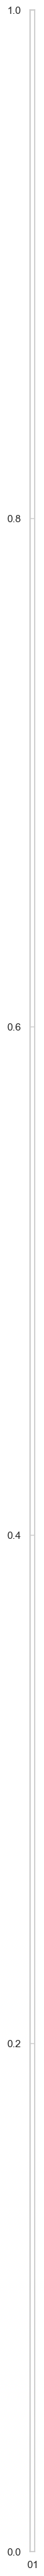

In [64]:
polarity_map = {
    'positive': ['happy', 'surprise'],
    'negative': ['sad', 'disgust', 'fear', 'angry'],
    'neutral': ['neutral']
}
df_lfw['pred_polarity'] = df_lfw['pred'].apply(lambda x: 'positive' if x in polarity_map['positive'] else ('negative' if x in polarity_map['negative'] else 'neutral'))

# get wrong predictions
wrong_predictions = df_lfw[df_lfw['emotion'] != df_lfw['pred_polarity']]
#print("Wrong Predictions:")
#print(wrong_predictions[['emo', 'pred']])
# plot wrong predictions
plt.figure(figsize=(50, 50))
for i, row in enumerate(wrong_predictions.sample(10).iterrows()):
    _, row_data = row
    plt.subplot(1, len(wrong_predictions), i + 1)
    img = row_data['pixels'].reshape(48, 48)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {row_data['emo']}\nPred: {row_data['pred']}")
    plt.axis('off')
plt.tight_layout()

In [ ]:
# 2. Ensure data type is uint8
gray_image = img.astype(np.uint8)

results = DeepFace.analyze(
                img_path=face_img,
                actions=['emotion'],
                detector_backend='mtcnn',
                enforce_detection=False,
                silent=True
            )

In [25]:
gray_image

array([[ 36,  39,  35, ...,  20,  38,  20],
       [ 38,  36,  41, ...,  15,  24,  55],
       [ 39,  37,  41, ...,   9,  12,  49],
       ...,
       [219, 243, 207, ..., 218, 206, 247],
       [229, 228, 212, ..., 229, 215, 233],
       [254, 247, 235, ..., 193, 251, 253]], dtype=uint8)

In [17]:
df.pred.value_counts()

pred
{'error': 'not enough values to unpack (expected 3, got 2)'}    920
Name: count, dtype: int64

In [16]:
recognizer.analyze_image(ck_imgs[3])

{'error': 'not enough values to unpack (expected 3, got 2)'}

In [ ]:
fer_imgs = [np.array(df_fer.iloc[i]['pixels'].split(" ")).reshape(48, 48) for i in range(len(df_fer))]
df_fer['pred'] = recognizer.analyze_video_frames(fer_imgs)


['36',
 '39',
 '35',
 '25',
 '19',
 '11',
 '8',
 '7',
 '3',
 '13',
 '15',
 '9',
 '21',
 '57',
 '75',
 '90',
 '101',
 '107',
 '111',
 '117',
 '122',
 '127',
 '127',
 '130',
 '135',
 '140',
 '138',
 '132',
 '125',
 '108',
 '95',
 '93',
 '69',
 '43',
 '26',
 '18',
 '14',
 '13',
 '7',
 '3',
 '8',
 '21',
 '26',
 '6',
 '4',
 '20',
 '38',
 '20',
 '38',
 '36',
 '41',
 '20',
 '19',
 '9',
 '8',
 '13',
 '11',
 '10',
 '5',
 '23',
 '56',
 '84',
 '97',
 '113',
 '115',
 '111',
 '113',
 '120',
 '126',
 '131',
 '130',
 '137',
 '139',
 '140',
 '141',
 '140',
 '132',
 '119',
 '111',
 '99',
 '88',
 '76',
 '47',
 '22',
 '7',
 '7',
 '8',
 '6',
 '3',
 '5',
 '12',
 '18',
 '4',
 '15',
 '24',
 '55',
 '39',
 '37',
 '41',
 '26',
 '14',
 '11',
 '15',
 '11',
 '14',
 '9',
 '10',
 '43',
 '69',
 '92',
 '106',
 '108',
 '114',
 '121',
 '125',
 '126',
 '127',
 '131',
 '134',
 '131',
 '134',
 '143',
 '147',
 '147',
 '140',
 '129',
 '127',
 '123',
 '115',
 '98',
 '72',
 '47',
 '26',
 '14',
 '8',
 '9',
 '14',
 '3',
 '14',
 

In [ ]:
import cv2

img = [int(i) for i in ck_imgs[0]]
img = np.array(img).reshape(48, 48)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)

error: OpenCV(4.9.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


: 

In [ ]:
recognizer.analyze_image()

{'error': 'not enough values to unpack (expected 3, got 1)'}

In [ ]:
recognizer.analyze_image(np.array([int(i) for i in range(len(df.iloc[0]['pixels']))]).reshape(48, 48))

ValueError: cannot reshape array of size 8036 into shape (48,48)

In [ ]:
df_fer

,emotion,pixels,Usage,pred
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,{'error': 'not enough values to unpack (expect...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,{'error': 'not enough values to unpack (expect...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,{'error': 'not enough values to unpack (expect...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,{'error': 'not enough values to unpack (expect...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,{'error': 'not enough values to unpack (expect...
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,{'error': 'not enough values to unpack (expect...
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,{'error': 'not enough values to unpack (expect...
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,{'error': 'not enough values to unpack (expect...
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,{'error': 'not enough values to unpack (expect...


In [ ]:
# LFW dataset
lfw_imgs = df_lfw['pixels'].tolist()
# make predictions
df_lfw['pred'] = test_face_emotion_recognizer(lfw_imgs)

Classification Report:
              precision    recall  f1-score   support

    negative       0.21      0.72      0.32        95
     neutral       0.63      0.52      0.57       417
    positive       0.89      0.68      0.77       645

    accuracy                           0.62      1157
   macro avg       0.58      0.64      0.55      1157
weighted avg       0.74      0.62      0.66      1157

[[ 68  17  10]
 [157 215  45]
 [101 108 436]]


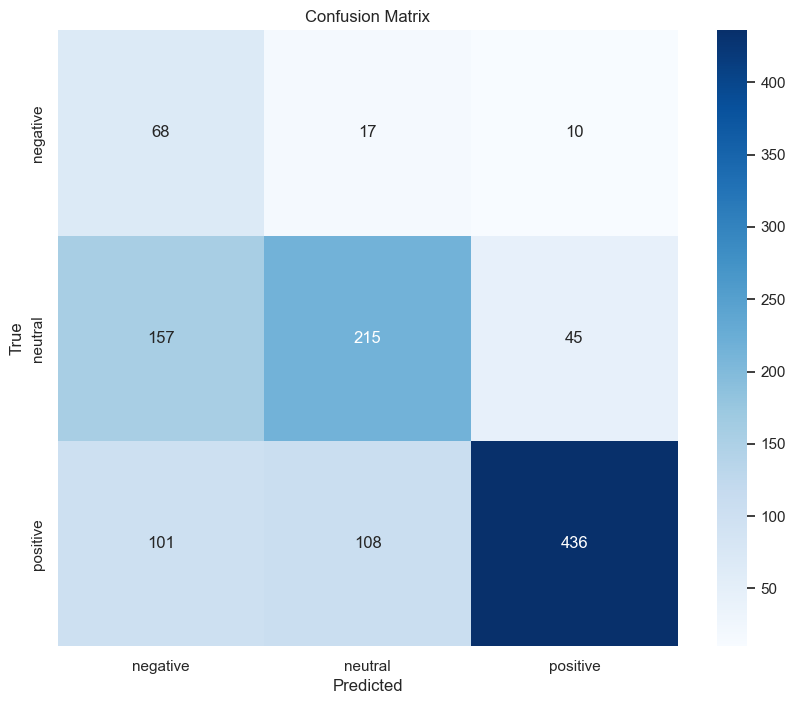

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

polarity_map = {
    'angry': 'negative',
    'disgust': 'negative',
    'fear': 'negative',
    'happy': 'positive',
    'sad': 'negative',
    'surprise': 'positive',
    'neutral': 'neutral'
}
df_lfw['pred_pol'] = df_lfw['pred'].map(polarity_map)

# Generate the classification report
report = classification_report(df_lfw['emotion'], df_lfw['pred_pol'])
# Print the classification report
print("Classification Report:")
print(report)
# generate the confusion matrix
conf_matrix = confusion_matrix(df_lfw['emotion'], df_lfw['pred_pol'])
print(conf_matrix)
emotion_order = ['negative', 'neutral', 'positive']
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_order, yticklabels=emotion_order)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your pre-trained VGG model is loaded
vgg_model = tf.keras.models.load_model('path/to/your/vgg_model.h5')

# Assume you have a function to load your test dataset and its labels
def load_fer_dataset(dataset_path, target_emotions=None):
    # This is a placeholder - adapt to your dataset loading mechanism
    images = []
    labels = []
    # ... (your data loading logic) ...
    return np.array(images), np.array(labels)

# Emotions your VGG model was trained on (example)
vgg_emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Load the target FER dataset
test_images, test_labels_raw = load_fer_dataset('path/to/your/fer_dataset')

# Filter the test data to include only the emotions your VGG model recognizes
valid_indices = [i for i, label in enumerate(test_labels_raw) if label in vgg_emotions]
test_images_filtered = test_images[valid_indices]
test_labels_filtered = np.array([test_labels_raw[i] for i in valid_indices])

# Convert string labels to numerical indices (consistent with your VGG model's training)
label_to_index = {emotion: i for i, emotion in enumerate(vgg_emotions)}
test_labels_numeric = np.array([label_to_index[label] for label in test_labels_filtered])

# Make predictions with your VGG model
predictions = vgg_model.predict(test_images_filtered)
predicted_labels_numeric = np.argmax(predictions, axis=1)

# Convert numerical predictions back to string labels
index_to_label = {i: emotion for i, emotion in enumerate(vgg_emotions)}
predicted_labels = [index_to_label[label] for label in predicted_labels_numeric]

# Evaluate the performance
print("Classification Report:")
print(classification_report(test_labels_filtered, predicted_labels))

# Confusion Matrix
cm = confusion_matrix(test_labels_filtered, predicted_labels)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=vgg_emotions, yticklabels=vgg_emotions)
plt.xlabel('Predicted Emotion')
plt.ylabel('True Emotion')
plt.title('Confusion Matrix')
plt.show()

Alright, let's strategize your Facial Expression Recognition (FER) experiments beyond the DeepFace API. You've already got a VGG model trained in TensorFlow, which is a great starting point! Dealing with datasets that might have extra labels is a common challenge in FER. Here's how you can approach testing your VGG model and some suggestions for your 16 experiments.

## Testing Your Pre-trained VGG Model on Datasets with Extra Labels

Here's a breakdown of how to handle datasets with more emotion labels than your VGG model was originally trained on:

**1. Understand Your VGG Model's Output:**

* **Number of Classes:** Determine how many emotion classes your pre-trained VGG model was trained to predict. Let's say it was trained on a dataset with 7 basic emotions (e.g., anger, disgust, fear, happiness, sadness, surprise, neutral).
* **Output Layer:** Identify the activation function of the final layer (usually softmax) and the number of output units (which corresponds to the number of classes).

**2. Understand the Target Dataset's Labels:**

* **Number of Classes:** Examine the emotion labels present in the dataset you want to test on. It might have the same 7 basic emotions, or it could have more (e.g., contempt, shame, etc.), or even a different set of labels entirely.

**3. Strategies for Handling Extra Labels:**

* **Ignore Extra Labels:** If the target dataset has labels that your VGG model doesn't predict, you can simply filter out those samples during testing. This allows you to evaluate your model on the subset of emotions it *does* recognize.
    * **Implementation:** When loading the test data, only include samples whose labels are present in the set of emotions your VGG model was trained on.
* **Map Extra Labels (if semantically related):** If some of the extra labels in the target dataset have a semantic relationship to the emotions your model predicts, you could try to map them. This is subjective and might not always be accurate. For example, "frustration" might be loosely related to "anger" or "sadness," but this kind of mapping can introduce noise.
    * **Implementation:** Create a mapping dictionary. During evaluation, if a sample has an extra label, map it to the closest label your model understands.
* **Evaluate on Common Subsets:** Identify the set of emotion labels that are common between your VGG model's training data and the target dataset. Evaluate your model's performance only on these common labels. This provides a direct comparison of how well your model generalizes to shared emotion categories.
    * **Implementation:** Filter both your VGG's predictions and the ground truth labels of the target dataset to include only the common emotions.

**4. Code Example (TensorFlow/Keras):**

```python
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your pre-trained VGG model is loaded
vgg_model = tf.keras.models.load_model('path/to/your/vgg_model.h5')

# Assume you have a function to load your test dataset and its labels
def load_fer_dataset(dataset_path, target_emotions=None):
    # This is a placeholder - adapt to your dataset loading mechanism
    images = []
    labels = []
    # ... (your data loading logic) ...
    return np.array(images), np.array(labels)

# Emotions your VGG model was trained on (example)
vgg_emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Load the target FER dataset
test_images, test_labels_raw = load_fer_dataset('path/to/your/fer_dataset')

# Filter the test data to include only the emotions your VGG model recognizes
valid_indices = [i for i, label in enumerate(test_labels_raw) if label in vgg_emotions]
test_images_filtered = test_images[valid_indices]
test_labels_filtered = np.array([test_labels_raw[i] for i in valid_indices])

# Convert string labels to numerical indices (consistent with your VGG model's training)
label_to_index = {emotion: i for i, emotion in enumerate(vgg_emotions)}
test_labels_numeric = np.array([label_to_index[label] for label in test_labels_filtered])

# Make predictions with your VGG model
predictions = vgg_model.predict(test_images_filtered)
predicted_labels_numeric = np.argmax(predictions, axis=1)

# Convert numerical predictions back to string labels
index_to_label = {i: emotion for i, emotion in enumerate(vgg_emotions)}
predicted_labels = [index_to_label[label] for label in predicted_labels_numeric]

# Evaluate the performance
print("Classification Report:")
print(classification_report(test_labels_filtered, predicted_labels))

# Confusion Matrix
cm = confusion_matrix(test_labels_filtered, predicted_labels)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=vgg_emotions, yticklabels=vgg_emotions)
plt.xlabel('Predicted Emotion')
plt.ylabel('True Emotion')
plt.title('Confusion Matrix')
plt.show()
```

**Key Points:**

* Adapt the `load_fer_dataset` function to your specific dataset loading process.
* Ensure the order of your `vgg_emotions` list matches the order of the output neurons in your VGG model.
* The filtering step is crucial for handling extra labels.

## Suggested Experiments for FER (2x2x2x2 = 16 Combinations)

Here are some ideas for your 16 FER experiments based on the categories you provided:

**Feature Extraction (Choose 2 Options):**

1.  **Raw Pixel Intensities:** Directly use the grayscale pixel values of the facial images as input to your models (after resizing and normalization). This allows the model to learn features from scratch.
2.  **Histograms of Oriented Gradients (HOG):** Extract HOG features from the facial images. HOG captures the distribution of gradient orientations in localized portions of an image, which can be informative for facial structure and expressions.

**Feature Selection (Choose 2 Options):**

1.  **No Feature Selection:** Use all the extracted features directly as input to your models.
2.  **Variance Thresholding:** Remove features with low variance. This can help eliminate features that don't change much across the dataset and might not be very informative.

**Evaluation Strategy (Choose 2 Options):**

1.  **Hold-Out Validation (80% Train, 20% Test):** Split your dataset into a training set (80%) and a separate, unseen test set (20%) for final evaluation.
2.  **5-Fold Stratified Cross-Validation:** Divide your training data into 5 folds, train on 4 folds, and validate on the remaining fold. Repeat this 5 times, ensuring each fold is used as the validation set once. Stratification ensures that each fold has roughly the same proportion of each emotion class.

**Modeling Approach (Choose 2 Options):**

1.  **Traditional ML (e.g., SVM with RBF kernel):** Train a Support Vector Machine with a Radial Basis Function (RBF) kernel on your chosen features (after feature extraction and selection).
2.  **Traditional DL (Micro-CNN):** Design and train a small Convolutional Neural Network (Micro-CNN) from scratch. This network would typically have a few convolutional layers, pooling layers, and fully connected layers.

**The 16 Experiments:**

Here's a table outlining the 16 possible combinations:

| Experiment | Feature Extraction | Feature Selection | Evaluation Strategy         | Modeling Approach         |
| :--------- | :----------------- | :---------------- | :-------------------------- | :-------------------------- |
| 1          | Raw Pixels         | None              | Hold-Out Validation         | SVM (RBF)                 |
| 2          | Raw Pixels         | None              | Hold-Out Validation         | Micro-CNN                 |
| 3          | Raw Pixels         | None              | 5-Fold Cross-Validation     | SVM (RBF)                 |
| 4          | Raw Pixels         | None              | 5-Fold Cross-Validation     | Micro-CNN                 |
| 5          | Raw Pixels         | Variance Thresholding | Hold-Out Validation         | SVM (RBF)                 |
| 6          | Raw Pixels         | Variance Thresholding | Hold-Out Validation         | Micro-CNN                 |
| 7          | Raw Pixels         | Variance Thresholding | 5-Fold Cross-Validation     | SVM (RBF)                 |
| 8          | Raw Pixels         | Variance Thresholding | 5-Fold Cross-Validation     | Micro-CNN                 |
| 9          | HOG                | None              | Hold-Out Validation         | SVM (RBF)                 |
| 10         | HOG                | None              | Hold-Out Validation         | Micro-CNN                 |
| 11         | HOG                | None              | 5-Fold Cross-Validation     | SVM (RBF)                 |
| 12         | HOG                | None              | 5-Fold Cross-Validation     | Micro-CNN                 |
| 13         | HOG                | Variance Thresholding | Hold-Out Validation         | SVM (RBF)                 |
| 14         | HOG                | Variance Thresholding | Hold-Out Validation         | Micro-CNN                 |
| 15         | HOG                | Variance Thresholding | 5-Fold Cross-Validation     | SVM (RBF)                 |
| 16         | HOG                | Variance Thresholding | 5-Fold Cross-Validation     | Micro-CNN                 |

**Implementation Notes:**

* **Data Loading and Preprocessing:** You'll need to load your FER datasets (e.g., FER-2013, CK+, RaFD) and preprocess the images (resize to a consistent size, convert to grayscale if needed, normalize pixel values).
* **Feature Extraction (HOG):** Use libraries like `skimage.feature.hog` to extract HOG features. You'll need to define parameters like the number of orientations, pixels per cell, and cells per block.
* **Feature Selection (Variance Thresholding):** Use `sklearn.feature_selection.VarianceThreshold`. Fit it on your training data and then transform both training and testing data.
* **Model Training (SVM):** Use `sklearn.svm.SVC` with `kernel='rbf'`. Tune hyperparameters like `C` and `gamma` using cross-validation on your training data.
* **Model Training (Micro-CNN):** Build a small CNN using TensorFlow/Keras or PyTorch. Experiment with different numbers of layers, filter sizes, activation functions, and pooling strategies. Train it from scratch on your training data.
* **Evaluation:** For each experiment, report relevant metrics like accuracy, precision, recall, F1-score, and confusion matrices on your test set (for hold-out) or the average across the validation folds (for cross-validation).

By systematically running these experiments, you can compare the effectiveness of different feature extraction techniques, the impact of feature selection, the robustness of your evaluation strategy, and the performance of traditional ML vs. a simple deep learning approach for FER. Remember to document your experimental setup and results carefully!